In [126]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import *
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer


In [293]:
data = np.loadtxt('../Data/features.csv',delimiter=',', skiprows=1) # skip row for column names

In [18]:
np.shape(data)

(124, 15)

In [19]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

## **Discharge Model**

In [20]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]

regressor = ElasticNet()

In [48]:
# Create the random grid
param_grid = { 'l1_ratio': np.linspace(0,1,10000),
              }
print(y_train)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
model= RandomizedSearchCV(estimator= regressor, n_iter = 20000, cv=folds, param_distributions = param_grid ,scoring="neg_mean_squared_error", random_state=42,verbose=2, return_train_score=True, n_jobs = -1)
print(model)
model.fit(x_train,y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(l1_ratio=0.0037003700370037006),
                   n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)
Fitting 4 folds for each of 10000 candidates, totalling 40

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10000 is smaller than n_iter=20000. Running 10000 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.828e-01, tolerance: 1.070e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(l1_ratio=0.0037003700370037006),
                   n_iter=20000, n_jobs=-1,
                   param_distributions={'l1_ratio': array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [9]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"])

In [10]:
regressor.fit(x_train,y_train)

ElasticNet(l1_ratio=1.0)

### **Metric Evaluation**

In [11]:
np.sqrt(np.mean((regressor.predict(x_test)-y_test)**2))

162.76587705783226

In [12]:
np.sqrt(np.mean((regressor.predict(x_stest)-y_stest)**2))

197.39365048416727

In [13]:
np.mean((np.abs(regressor.predict(x_train)-y_train))/y_train)

0.21006002955255068

In [14]:
np.mean((np.abs(regressor.predict(x_test)-y_test))/y_test)

0.20599888060138916

In [15]:
np.mean((np.abs(regressor.predict(x_stest)-y_stest))/y_stest)

0.12831217801626765

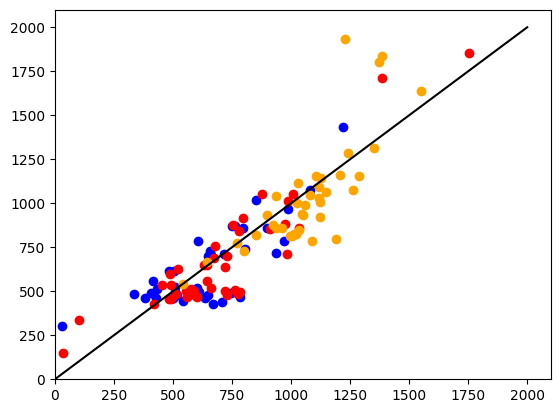

In [16]:
fig,ax=plt.subplots()
ax.scatter(regressor.predict(x_train),y_train,c="blue")
ax.scatter(regressor.predict(x_test),y_test,c="red")
ax.scatter(regressor.predict(x_stest),y_stest,c="orange")
ax.set_xlim([0,2100])
ax.set_ylim([0,2100])
ax.plot(np.linspace(0,2000),np.linspace(0,2000),color='black')

## **Improvement Discharge Model**

In [21]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:11]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:11]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:11]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [224]:
# Create the random grid
def loss(ground_truth, predictions):
    diff = np.sqrt(np.mean((10**ground_truth - 10**predictions)**2))
    return diff

my_scorer = make_scorer(loss, greater_is_better=False)

regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-6, 0, 10000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-0.01, 0, 100000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)
print(model)
model.fit(x_train, (y_train))

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-06, 1.00138264e-06, 1.00276720e-06, ...,
       9.97240436e-01, 9.98619265e-01, 1.00000000e+00]),
                                        'l1_ratio': array([0.97723722, 0.97723745, 0.97723767, ..., 0.99999954, 0.99999977,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=ma

RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-06, 1.00138264e-06, 1.00276720e-06, ...,
       9.97240436e-01, 9.98619265e-01, 1.00000000e+00]),
                                        'l1_ratio': array([0.97723722, 0.97723745, 0.97723767, ..., 0.99999954, 0.99999977,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [225]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [226]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=9.554281212853748e-05, l1_ratio=0.999988256767545)

In [227]:
print("RMSE on Train Data: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2) ))

RMSE on Train Data:  95.06091830480328


In [228]:
print("RMSE on Primary Test: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2) ))
# 1 is the best score

RMSE on Primary Test:  121.93710996333739


In [229]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean( (np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2) ))
# 1 is the best score

RMSE on Secondary Test:  255.47837233800485


In [230]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train)-10**y_train)/10**y_train)))

MPE on Train Data:  0.12638156961675356


In [231]:
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test)-10**y_test)/10**y_test)))

MPE on Primary Test:  0.16025788101593696


In [232]:
10**regressor.predict(x_test) - 10**y_test

array([-137.86028139, -304.07139119, -266.42531046,   69.52888027,
       -171.07239092,  -28.764638  ,   67.42161461, -117.45891491,
        -76.2582312 , -128.15261072,    3.6924047 ,  -90.82901713,
       -172.26465353,  -64.70127203,  -50.3610809 ,  -50.54981591,
        -19.49738242,  -44.92059518,  -75.34581804,  -54.89839827,
        -65.83234583,  121.89956743,  -39.29861899,   64.49695814,
        -12.58752605,   -8.54646945,   64.10494708,   86.42717505,
        159.02197262,   92.07355881,  353.51264519,  101.05510468,
        175.50328452,  144.75748584,  104.31988963,  170.58873119,
         36.58317423,   70.13860117,   62.25042845,  106.9724176 ,
         33.29023851,   31.8158324 ,  -44.70807123])

In [233]:
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest)-10**y_stest)/10**y_stest)))

MPE on Secondary Test:  0.15612348724846492


In [27]:
regressor.coef_

array([-0.59697388, -5.58325526, -0.12161725,  0.05302606, -9.94423141,
        6.57453647, -0.28911146,  3.50069761, -0.18423248, -5.68454454])

## **Full Model**

In [294]:
# use indices [1:11] if only consdering variables from "discharge model"
# use [1:] if considering variables from "full model"
x_train = data[train_ind,1:]
y_train = data[train_ind,0]
y_train = np.log10(y_train) #tried with np.log10 as well

x_test = data[test_ind,1:]
y_test = data[test_ind,0]
y_test = np.log10(y_test)

x_stest = data[secondary_ind,1:]
y_stest = data[secondary_ind,0]
y_stest = np.log10(y_stest)
print(y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]


In [259]:
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-3.5, 0, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-0.25, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)

model.fit(x_train, y_train)

[3.33445375 3.15654915 3.03100428 2.93951925 2.89652622 2.85672889
 2.93298082 2.89652622 2.74741181 3.00732095 2.93951925 2.93449845
 2.85064624 2.86391738 2.87040391 2.84757266 2.79028516 2.98497713
 2.84633711 2.78958071 2.47712125 2.64147411 2.64738297 2.7084209
 2.67851838 2.68394713 2.69372695 2.66370093 2.68930886 2.72181062
 2.66370093 2.67024585 2.69722934 2.6919651  2.71600334 2.66558099
 2.6794279  2.66181269 2.63245729 2.66464198 2.68752896]
Fitting 4 folds for each of 20000 candidates, totalling 80000 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([3.16227766e-04, 3.18789129e-04, 3.21371239e-04, 3.23974263e-04,
       3.26598371e-04, 3.29243733e-04, 3.31910523e-04, 3.34598912e-04,
       3.37309077e-04, 3.40041193e-04, 3.42795439e-04, 3.45571994e-04,
       3.48371038e-04, 3.51...
       9.15085053e-01, 9.22497005e-01, 9.29968993e-01, 9.37501502e-01,
       9.45095022e-01, 9.52750047e-01, 9.60467077e-01, 9.68246612e-01,
       9.76089159e-01, 9.83995230e-01, 9.91965337e-01, 1.00000000e+00]),
                                        'l1_ratio': array([0.56234133, 0.5623737 , 0.56240608, ..., 0.99988487, 0.99994243,
       1.        ])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

In [295]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])

In [296]:
regressor.fit(x_train,y_train)

ElasticNet(alpha=0.00031622776601683794, l1_ratio=0.5635404474953676)

In [297]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train))-np.power(10,y_train))**2) ))

RMSE on Train Data:  100.42920318521466


In [298]:
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test))-np.power(10,y_test))**2) ))


RMSE on Primary Test:  123.0712962400579


In [299]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest))-np.power(10,y_stest))**2) ))

RMSE on Secondary Test:  328.7998521851137


In [300]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train)-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test)-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest)-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.12792368067035403
MPE on Primary Test:  0.14775039078071572
MPE on Secondary Test:  0.21197033906142188


## **Variance Model**

In [301]:
data = np.loadtxt('../Data/vardQ_.6f.csv',delimiter=',') # skip row for column names

In [302]:
test_ind = np.array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 83])

train_ind = np.array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81])

secondary_ind = np.array([ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123])

In [303]:
x_train = data[:, 0][train_ind]
y_train = data[:, 1][train_ind]

x_test = data[:, 0][test_ind]
y_test = data[:, 1][test_ind]

x_stest = data[:, 0][secondary_ind]
y_stest = data[:, 1][secondary_ind]

regressor = SVR()
# regressor.fit(x_train.reshape(-1, 1),y_train)

In [283]:
regressor = ElasticNet()
param_grid = {
    'alpha': np.logspace(-7, 0, 1000),  # Range of alpha values to explore
    'l1_ratio': np.logspace(-7, 0, 10000)
}
print(y_train)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
model = RandomizedSearchCV(
    estimator=regressor,
    n_iter=20000,
    cv=folds,
    param_distributions=param_grid,
    scoring=my_scorer,
    random_state=42,
    verbose=2,
    return_train_score=True,
    n_jobs=-1
)

model.fit(x_train.reshape(-1, 1), y_train)

[3.334454 3.156549 3.031004 2.939519 2.896526 2.856729 2.932981 2.896526
 2.747412 3.007321 2.939519 2.934498 2.850646 2.863917 2.870404 2.847573
 2.790285 2.984977 2.846337 2.789581 2.477121 2.641474 2.647383 2.708421
 2.678518 2.683947 2.693727 2.663701 2.689309 2.721811 2.663701 2.670246
 2.697229 2.691965 2.716003 2.665581 2.679428 2.661813 2.632457 2.664642
 2.687529]
Fitting 4 folds for each of 20000 candidates, totalling 80000 fits


RandomizedSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
                   estimator=ElasticNet(), n_iter=20000, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-07, 1.01626509e-07, 1.03279473e-07, 1.04959323e-07,
       1.06666496e-07, 1.08401436e-07, 1.10164595e-07, 1.11956432e-07,
       1.13777413e-07, 1.15628013e-07, 1.17508713e-07, 1.19420003e-07,
       1.21362380e-07, 1.23...
       8.37380654e-01, 8.51000725e-01, 8.64842328e-01, 8.78909065e-01,
       8.93204600e-01, 9.07732653e-01, 9.22497005e-01, 9.37501502e-01,
       9.52750047e-01, 9.68246612e-01, 9.83995230e-01, 1.00000000e+00]),
                                        'l1_ratio': array([1.00000000e-07, 1.00161327e-07, 1.00322914e-07, ...,
       9.96781250e-01, 9.98389328e-01, 1.00000000e+00])},
                   random_state=42, return_train_score=True,
                   scoring=make_scorer(loss, greater_is_better=False),
                   verbose=2)

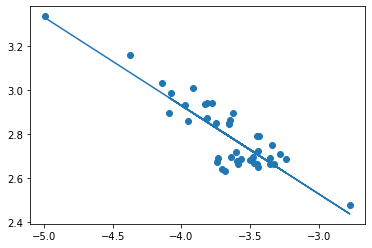

In [284]:
plt.scatter(x_train,y_train)
plt.plot(x_train, model.predict(x_train.reshape(-1,1)))

In [285]:
print("Best RMS score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best RMS score:  -122.72639035379655
Best hyperparameters:  {'l1_ratio': 1.0614574517283599e-07, 'alpha': 1e-07}


In [304]:
regressor = ElasticNet(l1_ratio=model.best_params_["l1_ratio"], alpha=model.best_params_['alpha'])
regressor.fit(x_train.reshape(-1,1),y_train)

ElasticNet(alpha=1e-07, l1_ratio=1.0614574517283599e-07)

In [305]:
print("RMSE on Train Data: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_train.reshape(-1,1)))-
                                               np.power(10,y_train))**2) ))

RMSE on Train Data:  116.53949370982102


In [306]:
print("RMSE on Primary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_test.reshape(-1,1)))-np.power(10,y_test))**2) ))

RMSE on Primary Test:  137.59110258821548


In [307]:
print("RMSE on Secondary Test: ", np.sqrt(np.mean((np.power(10,regressor.predict(x_stest.reshape(-1,1)))-np.power(10,y_stest))**2) ))

RMSE on Secondary Test:  212.66469540987137


In [309]:
print("MPE on Train Data: ",np.average(np.abs((10**regressor.predict(x_train.reshape(-1,1))-10**y_train)/10**y_train)))
print("MPE on Primary Test: ",np.average(np.abs((10**regressor.predict(x_test.reshape(-1,1))-10**y_test)/10**y_test)))
print("MPE on Secondary Test: ",np.average(np.abs((10**regressor.predict(x_stest.reshape(-1,1))-10**y_stest)/10**y_stest)))

MPE on Train Data:  0.15783086062145
MPE on Primary Test:  0.1662940377224816
MPE on Secondary Test:  0.12478569537147885
